In [176]:
# All imports 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib.colors import ListedColormap

##### Data source:
https://www.kaggle.com/code/aslibaraf/customer-behavior-analysis

In [2]:
# open the dataset
customers_df = pd.read_csv("Online Retail.csv")

## 1. Data Exploration

In [3]:
# Check how the data looks like
customers_df.head()
customers_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France


In [4]:
# Check the size of the data
print(customers_df.shape)

(541909, 8)


In [5]:
# Check the stats for each column and find the types per column
customers_df.info()

# The last number shows how many times the item was purchased by that person
customers_df.value_counts()

# Getting the stats per column
customers_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  int64  
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 33.1+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,15287.518434
std,218.081158,96.759853,1484.746041
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14367.000000
50%,3.000000,2.080000,15287.000000
75%,10.000000,4.130000,16255.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
# since the invoice data is  an object, it has to be converted in datetime format
customers_df['InvoiceDate'] = pd.to_datetime(customers_df['InvoiceDate'])

In [7]:
# From the describe method, it is seen that there are some negative values
# Check the negative values 
# Then remove them

customers_df = customers_df[customers_df['UnitPrice'] > 0]

# Verify that
print(customers_df[customers_df['UnitPrice'] <= 0])



Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


In [8]:
# Now we do the same for Quantity; checking it less than or equal to zero
non_positive_quantity = customers_df[customers_df['Quantity'] <= 0]
print(non_positive_quantity)

# These are probably returns, so I will drop them


customers_df = customers_df[customers_df['Quantity'] > 0]
# Verify 
print(customers_df[customers_df['Quantity'] <= 0])



       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  
141    2010-12-01 09:41:00      27.50      

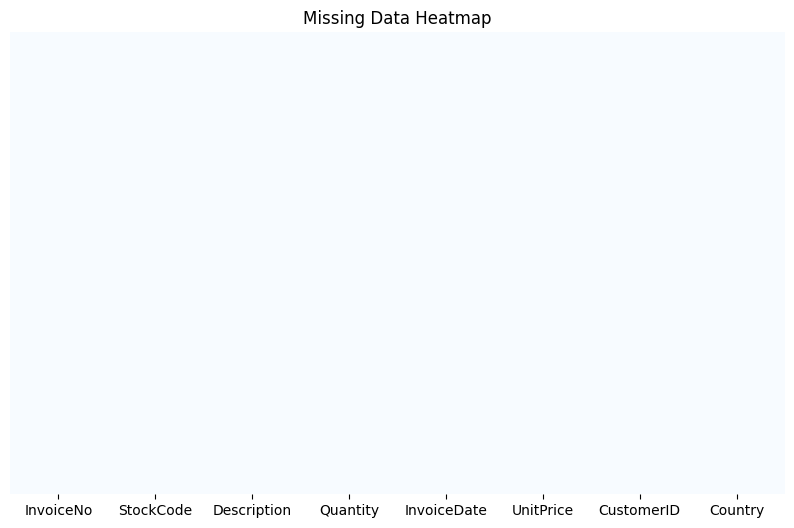

In [9]:
# Checking if there is any missing data 
plt.figure(figsize=(10, 6))
sns.heatmap(customers_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')
plt.title("Missing Data Heatmap")
plt.show()

In [10]:
# Get the number of the missing values in Description column
missing_values = customers_df.isnull().sum()
print(missing_values)

# Great all zeros 

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


### 1.1 EDA

##### A) Top 10 countries sold the most items

In [27]:

# First, I Group by Country and  then I sum the quantities
country_sales = customers_df.groupby('Country')['Quantity'].sum().reset_index()
# Sorting the result by the quantity sold 
country_sales = country_sales.sort_values(by='Quantity', ascending=False)


# Then I create a new dataframe, having the top 10 countries 
top_10_countries = country_sales.head(10)

# Verify
print(top_10_countries)



           Country  Quantity
36  United Kingdom   4662390
24     Netherlands    200361
10            EIRE    147173
14         Germany    119261
13          France    112103
0        Australia     83901
32          Sweden     36083
33     Switzerland     30629
31           Spain     27940
20           Japan     26016


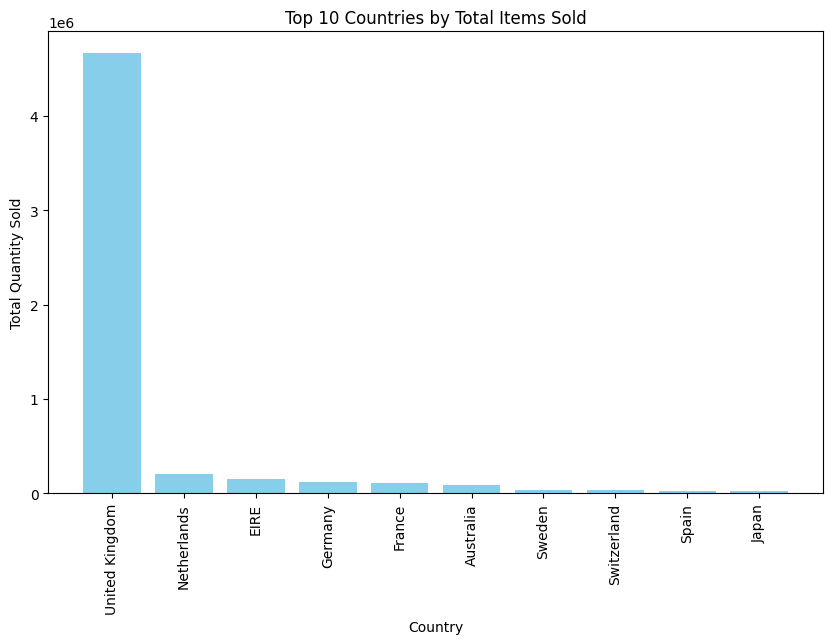

In [36]:
# Plot the results as a histogram
plt.figure(figsize=(10, 6))  

# Bar chart
plt.bar(top_10_countries['Country'], top_10_countries['Quantity'], color='skyblue')

# Rotate country names  label 
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')
plt.title('Top 10 Countries by Total Items Sold')

# Show the plot
plt.show()


##### B) Top 10 items that were sold the most in the UK 

In [44]:
# First I filter the data for sales in the United Kingdom
uk_sales = customers_df[customers_df['Country'] == 'United Kingdom']
print(uk_sales.head())

# Secodnly, I group by the StockCOde and the Description, then I sum the quantities
uk_top_items = uk_sales.groupby(['StockCode', 'Description'])['Quantity'].sum().reset_index()
uk_top_items.head()

# After I sort by quantity sold in descending order
uk_top_items = uk_top_items.sort_values(by='Quantity', ascending=False)

# I get the top 10 items
top_10_uk_items = uk_top_items.head(10)
print(top_10_uk_items)



  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75       17850  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34  
4 2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34  
     StockCode                         Description  Quantity
2653     23843         PAPER CRAFT , LITTLE BIRDIE     8

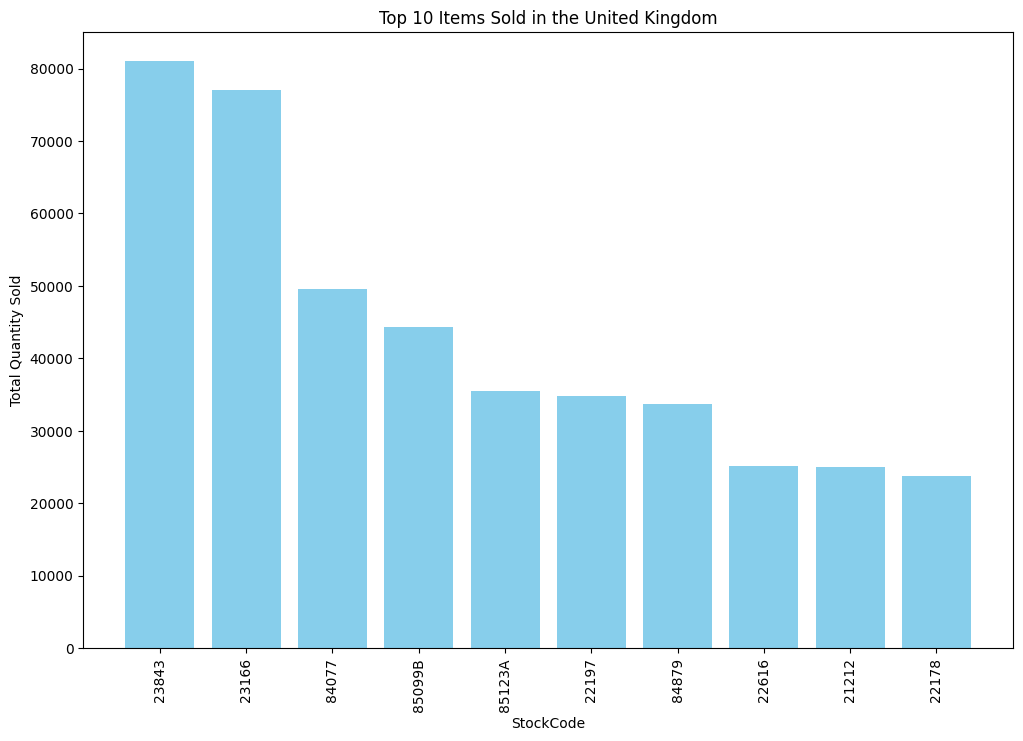

In [49]:
# Plot the result
plt.figure(figsize=(12, 8)) 

# Create the bar chart
plt.bar(top_10_uk_items['StockCode'], top_10_uk_items['Quantity'], color='skyblue')
plt.xlabel('StockCode')
plt.ylabel('Total Quantity Sold')
plt.title('Top 10 Items Sold in the United Kingdom')
plt.xticks(rotation=90)  
plt.show()


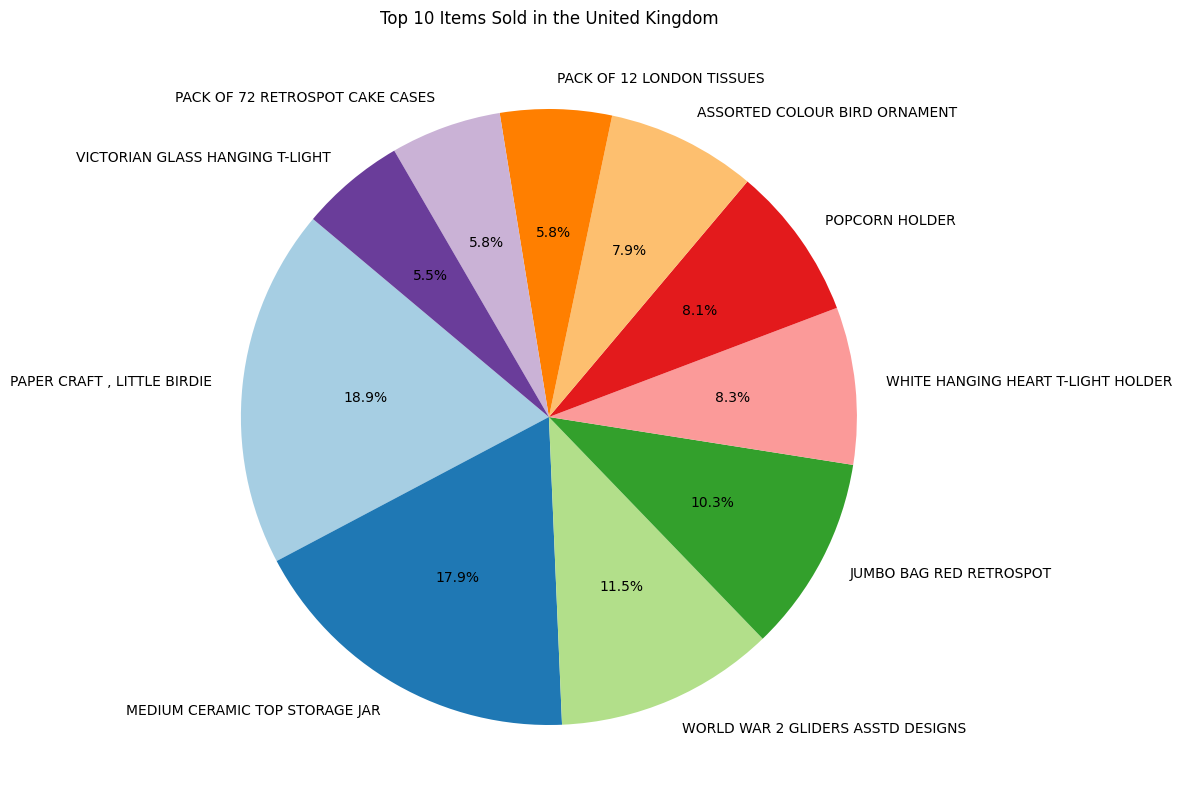

In [53]:
# Create a pie chart with the items' description
plt.figure(figsize=(12, 10))  
plt.pie(top_10_uk_items['Quantity'], labels=top_10_uk_items['Description'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 10 Items Sold in the United Kingdom')
plt.show()



##### B) Top 10 customers who shopped the most (spent the most money)

In [58]:

# Multiply the quantity times the unit price to get the total price
customers_df['TotalSpend'] = customers_df['Quantity'] * customers_df['UnitPrice']

# Group by CustomerID and sum the total spend
customer_spend = customers_df.groupby('CustomerID')['TotalSpend'].sum().reset_index()
top_customer = customer_spend.sort_values(by='TotalSpend', ascending=False).head(10)
print(top_customer)


      CustomerID  TotalSpend
2159       15287  1755763.33
1689       14646   280206.02
4201       18102   259657.30
3728       17450   194550.79
3008       16446   168472.50
1879       14911   143825.06
55         12415   124914.53
1333       14156   117379.63
3771       17511    91062.38
2702       16029    81024.84


In [64]:
# Get only the customer IDs
top_customers_ids = top_customer['CustomerID']
top_customers_details = customers_df[customers_df['CustomerID'].isin(top_customers_ids)]
top_customers_details = top_customers_details[['CustomerID', 'Country', 'Description', 'Quantity', 'UnitPrice', 'TotalSpend','InvoiceDate']].drop_duplicates()
print(top_customers_details)

        CustomerID         Country                     Description  Quantity  \
175          16029  United Kingdom           WHITE WIRE EGG HOLDER        36   
176          16029  United Kingdom  JUMBO  BAG BAROQUE BLACK WHITE       100   
177          16029  United Kingdom         JUMBO BAG RED RETROSPOT       100   
178          16029  United Kingdom                   CHILLI LIGHTS       192   
179          16029  United Kingdom  LIGHT GARLAND BUTTERFILES PINK       192   
...            ...             ...                             ...       ...   
541537       15287  United Kingdom  JUMBO  BAG BAROQUE BLACK WHITE         4   
541538       15287  United Kingdom   LADIES & GENTLEMEN METAL SIGN         1   
541539       15287  United Kingdom               S/4 CACTI CANDLES         1   
541540       15287  United Kingdom                  DOTCOM POSTAGE         1   
541702       18102  United Kingdom      HOME SWEET HOME BLACKBOARD       144   

        UnitPrice  TotalSpend         I

##### C) Which part of the day, do customers shop the most?


In [72]:
# Fisrt, checking for how long I have the data for
min_date = customers_df['InvoiceDate'].min()
max_date = customers_df['InvoiceDate'].max()
print("Minimum Date:", min_date)
print("Maximum Date:", max_date)

Minimum Date: 2010-12-01 08:26:00
Maximum Date: 2011-12-09 12:50:00


In [77]:
# To check that I need to split the InvoiceDate into date, hour,time and the month of the year

# Extract Time and YearMonth
customers_df['Time'] = customers_df['InvoiceDate'].dt.time
customers_df['YearMonth'] = customers_df['InvoiceDate'].dt.to_period('M')
customers_df['Hour'] = customers_df['InvoiceDate'].dt.hour


print(customers_df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
0 2010-12-01 08:26:00       2.55       17850  United Kingdom       15.30   
1 2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34   
2 2010-12-01 08:26:00       2.75       17850  United Kingdom       22.00   
3 2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34   
4 2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34   

   TotalSpend        Date      Time YearMonth  Hour  
0       15.30  2010-12-01  08:26:00   2010-12     8  
1 

##### C) Which month has the most sold items over the period of 1 year?

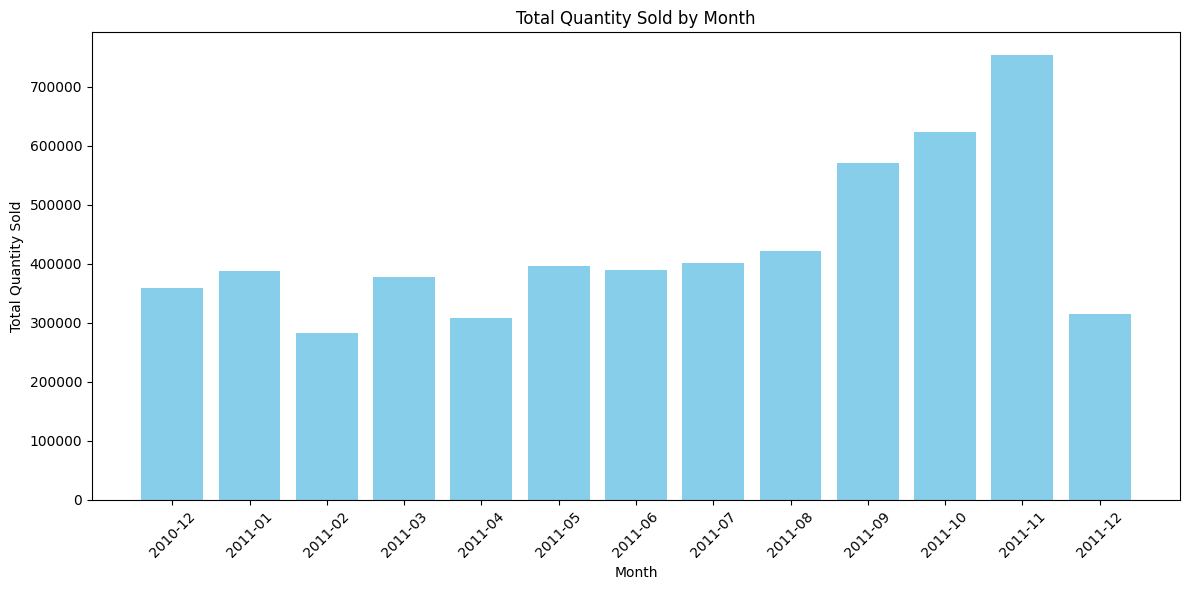

In [78]:
# Get how many quantity items were sold per month 
monthly_sales = customers_df.groupby('YearMonth').agg({'Quantity': 'sum','TotalSpend': 'sum'}).reset_index()
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)

# Plot total quantity sold by each moonth from December 2010 to December 2011
plt.figure(figsize=(12, 6))
plt.bar(monthly_sales['YearMonth'], monthly_sales['Quantity'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.title('Total Quantity Sold by Month')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

##### D) Which part of the day, were sold the most items?

In [81]:
# Split the day time into Morning, Noon,Afternoon and Night 
def get_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 13:
        return 'Noon'
    elif 13 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Night'

customers_df['TimeOfDay'] = customers_df['Hour'].apply(get_time_of_day)
customers_df.head(10)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,TotalSpend,Date,Time,YearMonth,Hour,TimeOfDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,15.30,2010-12-01,08:26:00,2010-12,8,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,20.34,2010-12-01,08:26:00,2010-12,8,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,22.00,2010-12-01,08:26:00,2010-12,8,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,20.34,2010-12-01,08:26:00,2010-12,8,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,20.34,2010-12-01,08:26:00,2010-12,8,Morning
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30,15.30,2010-12-01,08:26:00,2010-12,8,Morning
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50,25.50,2010-12-01,08:26:00,2010-12,8,Morning
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,11.10,2010-12-01,08:28:00,2010-12,8,Morning
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,11.10,2010-12-01,08:28:00,2010-12,8,Morning
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08,54.08,2010-12-01,08:34:00,2010-12,8,Morning


Text(0.5, 0, 'Time of Day')

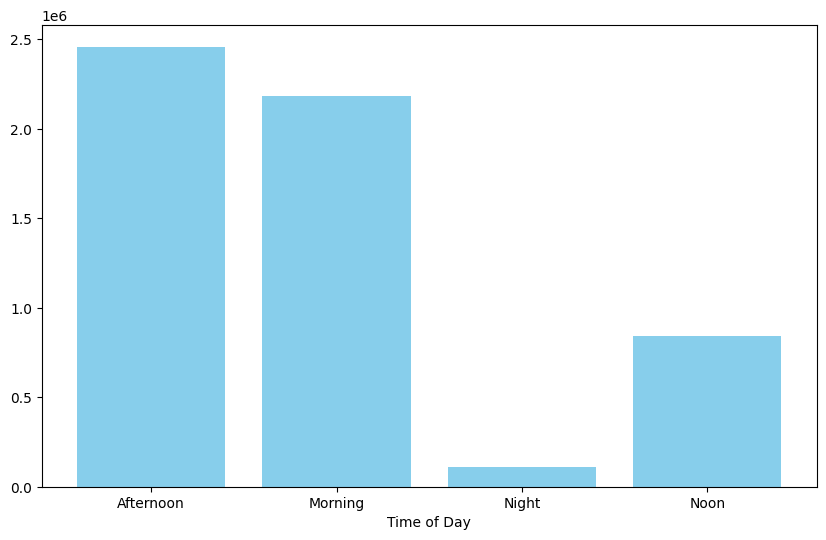

In [84]:
# Group the data by the time of the day that was created 
time_segment_sales = customers_df.groupby('TimeOfDay').agg({'Quantity': 'sum','TotalSpend': 'sum'}).reset_index()

# Plot 
plt.figure(figsize=(10, 6))
plt.bar(time_segment_sales['TimeOfDay'], time_segment_sales['Quantity'], color='skyblue')
plt.xlabel('Time of Day')

## 2. Feature Engineering 
##### Creating RFM (Recency,Frequency,Monetary) -> A marketing strategy for customers' segmentation
    * Recency-> how many days since the last purchase individual for each customer
    * Frequency-> how many uniqie purchases per customer
    * Monetary-> how much money each customer has spent 

In [95]:
# Get the total price for each transaction
customers_df['TotalPrice'] = customers_df['Quantity'] * customers_df['UnitPrice']
customers_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,TotalSpend,Date,Time,YearMonth,Hour,TimeOfDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,15.30,2010-12-01,08:26:00,2010-12,8,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,20.34,2010-12-01,08:26:00,2010-12,8,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,22.00,2010-12-01,08:26:00,2010-12,8,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,20.34,2010-12-01,08:26:00,2010-12,8,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,20.34,2010-12-01,08:26:00,2010-12,8,Morning


#### 2.1 Calculate Recency

In [100]:
# Get Recency; count days since the last purchase

# Group by CustomerID and find the most recent (max) InvoiceDate for each customer
most_recent_purchases = customers_df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
most_recent_purchases.head(5)

most_recent_purchases.rename(columns={'InvoiceDate': 'LastPurchaseDate'}, inplace=True)
print(most_recent_purchases)


      CustomerID    LastPurchaseDate
0          12346 2011-01-18 10:01:00
1          12347 2011-12-07 15:52:00
2          12348 2011-09-25 13:13:00
3          12349 2011-11-21 09:51:00
4          12350 2011-02-02 16:01:00
...          ...                 ...
4333       18280 2011-03-07 09:52:00
4334       18281 2011-06-12 10:53:00
4335       18282 2011-12-02 11:43:00
4336       18283 2011-12-06 12:02:00
4337       18287 2011-10-28 09:29:00

[4338 rows x 2 columns]


In [111]:
# Get how many days since the last purchase (The Recency) per customer
# Create a function that calculates the nummber of days from today to last purchased


import pandas as pd

def calculate_recency(customers_df):
    # Set the date, which is today
    reference_date = pd.Timestamp.now()
    
    # Find the most recent purchase date for each customer
    last_purchase_dates = customers_df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
    last_purchase_dates.rename(columns={'InvoiceDate': 'LastPurchaseDate'}, inplace=True)
    
    # Calculate recency in days, today - the last purchase day
    last_purchase_dates['Recency'] = (reference_date - last_purchase_dates['LastPurchaseDate']).dt.days
    
    # Merge recency with the main dataframe 
    customers_df = customers_df.merge(last_purchase_dates[['CustomerID', 'Recency']], on='CustomerID', how='left')
    
    return customers_df

customers_df_with_recency = calculate_recency(customers_df)
print(customers_df_with_recency)



       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
530099    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
530100    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
530101    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
530102    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
530103    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPri

#### 2.2 Calculate Frequency

In [113]:
# Get the number of unique purchases per customer
# Frequency

def calculate_frequency(customers_df):
    # Get the number of unique invoices per customer
    frequency = customers_df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
    frequency.columns = ['CustomerID', 'Frequency']
    
    # Merge frequency 
    customers_df = customers_df.merge(frequency, on='CustomerID', how='left')
    
    return customers_df


customers_df_with_frequency = calculate_frequency(customers_df_with_recency)
print(customers_df_with_frequency.head(5))

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
0 2010-12-01 08:26:00       2.55       17850  United Kingdom       15.30   
1 2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34   
2 2010-12-01 08:26:00       2.75       17850  United Kingdom       22.00   
3 2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34   
4 2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34   

   TotalSpend        Date      Time YearMonth  Hour TimeOfDay  Recency  \
0       15.30  2010-12-01  08:26:00 

#### 2.3 Calculate Monenary

In [116]:

def calculate_monetary(customers_df):

    # Calculate the total amount spent per customer
    customers_df['TotalAmount'] = customers_df['Quantity'] * customers_df['UnitPrice']
    # Sum the total amount spent for each customer
    monetary = customers_df.groupby('CustomerID')['TotalAmount'].sum().reset_index()
    monetary.columns = ['CustomerID', 'Monetary']
    
    # Merge monetary
    customers_df = customers_df.merge(monetary, on='CustomerID', how='left')
    
    return customers_df


customers_df_with_monetary = calculate_monetary(customers_df_with_frequency)

print(customers_df_with_monetary.head(5))

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
0 2010-12-01 08:26:00       2.55       17850  United Kingdom       15.30   
1 2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34   
2 2010-12-01 08:26:00       2.75       17850  United Kingdom       22.00   
3 2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34   
4 2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34   

   TotalSpend        Date      Time YearMonth  Hour TimeOfDay  Recency  \
0       15.30  2010-12-01  08:26:00 

#### 2.4 RFM Dataframe no dublicates


In [124]:
# Keep only the CustomerID, Recency,Frequency and Monetary
RFM_df = customers_df_with_monetary[['CustomerID', 'Recency', 'Frequency', 'Monetary']]

#print(RFM_df.tail(30))

# Since there are manny dublicates, meaning that there are 
# several items purchsed by the same CustomerID, I need to remove the dublicates

# Remove duplicates
RFM_df_no_duplicates = RFM_df.drop_duplicates()
print(RFM_df_no_duplicates)


        CustomerID  Recency  Frequency  Monetary
0            17850     5038         34   5391.21
9            13047     4698         10   3237.54
26           12583     4669         15   7281.38
46           13748     4762          5    948.25
65           15100     5000          3    876.00
...            ...      ...        ...       ...
525227       13436     4668          1    196.89
525507       15520     4668          1    343.50
526305       13298     4668          1    360.00
527034       14569     4667          1    227.39
529963       12713     4667          1    848.55

[4338 rows x 4 columns]


## 3. Customer Segmentation using Clustering

In [127]:
# Extract  the RFM features for clustering
features = RFM_df_no_duplicates[['Recency', 'Frequency', 'Monetary']]

# Standardize the features, beacuse the 3 features have different ranges 
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


#### 3.1 Impelent K-means clustering and Elbow method to see how many clusters 

c:\Users\45911\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\45911\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\45911\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\45911\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

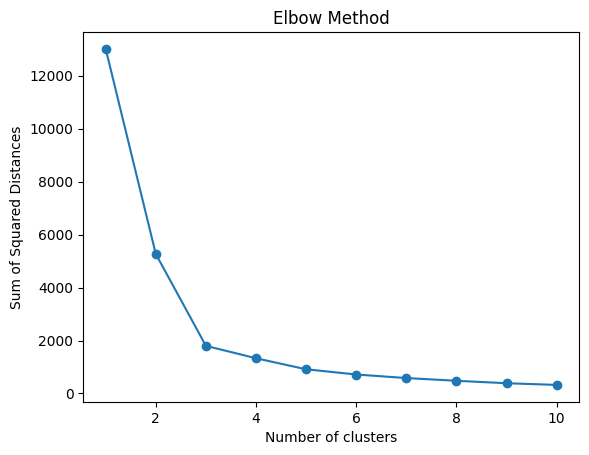

In [129]:

sum_squared_distances = []

# Loop over different values of k clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(features_scaled)
    
    sum_squared_distances.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), sum_squared_distances, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()


In [134]:
# Since the elbow method shows that 4 or 5 is the optiman numebr of clusters, 
# I chose 4 becuase the difference between 4 and 5 is small

# Apply K-Means clustering
k = 4  
kmeans = KMeans(n_clusters=k, random_state=0)
customer_data['Cluster'] = kmeans.fit_predict(features_scaled)

print(customer_data.head())


   CustomerID  Recency  Frequency  Monetary  Cluster      PCA1      PCA2  \
0       12346      325          1  77183.60        1  0.663197  2.851627   
1       12347        1          7   4310.00        0  0.252647 -0.588304   
2       12348       74          4   1797.24        0  0.539135 -0.849662   
3       12349       18          1   1757.55        3 -0.029046  0.027113   
4       12350      309          1    334.40        1 -0.357318  2.385544   

       TSNE1      TSNE2  
0  -2.301558  89.250847  
1  34.357105  -3.117877  
2  52.112015   1.668631  
3  -2.902194  11.401446  
4  27.079306  67.328201  


c:\Users\45911\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [135]:
# Analyzing the characteristics of each cluster
cluster_summary = customer_data.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Number of Customers'})

print(cluster_summary)


           Recency  Frequency     Monetary  Number of Customers
Cluster                                                        
0        91.506224   4.273859  2049.686649                 2892
1        86.372204   6.626198  4768.336506                  626
2         8.000000   4.000000  3750.400000                    1
3        95.666667   4.210012  2137.071674                  819


#### Since cluster 2  has only 1 person and it seems like an outlier, I have decided to check further:
1. Find the CustomerID
2. Check the shopping habbits 
* Conclusion: A person who has done 97 purchases, who has spent 3750,4

In [142]:
# Values to match
target_recency = 8.000000
target_frequency = 4.000000
target_monetary = 3750.400000

matching_customers = customer_data[
    (customer_data['Recency'] == target_recency) &
    (customer_data['Frequency'] == target_frequency) &
    (customer_data['Monetary'] == target_monetary)
]

# Display matching CustomerIDs
print(matching_customers[['CustomerID']])

    CustomerID
67       12429


In [141]:
# CustomerID to check
customer_id_to_check = 12429

# Filter rows with the specific CustomerID
rows_with_customer = RFM_df[RFM_df['CustomerID'] == customer_id_to_check]

# Display rows with CustomerID = 12429
print("Rows with CustomerID =", customer_id_to_check)
print(rows_with_customer)

Rows with CustomerID = 12429
        CustomerID  Recency  Frequency  Monetary
19619        12429     4675          4    3750.4
19620        12429     4675          4    3750.4
19621        12429     4675          4    3750.4
19622        12429     4675          4    3750.4
19623        12429     4675          4    3750.4
...            ...      ...        ...       ...
504841       12429     4675          4    3750.4
504842       12429     4675          4    3750.4
504843       12429     4675          4    3750.4
504844       12429     4675          4    3750.4
504845       12429     4675          4    3750.4

[97 rows x 4 columns]


#### 3.1 Impelent K-means clustering and Elbow method to see how many clusters, when the outlier is removed

#### 3.1.1 Remove the outliers after deeper analysis 

In [162]:
# Remove customer with the following CustomerID:12429


# CustomerIDs to remove
customer_ids_to_remove = [12429, 15287]

# Remove rows where CustomerID is in the list of IDs to remove
RFM_df_no_duplicates_outlier_removed = RFM_df_no_duplicates[~RFM_df_no_duplicates['CustomerID'].isin(customer_ids_to_remove)]

# Display the DataFrame after removal
print("DataFrame after removing CustomerIDs =", customer_ids_to_remove)
print(RFM_df_no_duplicates_outlier_removed)



DataFrame after removing CustomerIDs = [12429, 15287]
        CustomerID  Recency  Frequency  Monetary
0            17850     5038         34   5391.21
9            13047     4698         10   3237.54
26           12583     4669         15   7281.38
46           13748     4762          5    948.25
65           15100     5000          3    876.00
...            ...      ...        ...       ...
525227       13436     4668          1    196.89
525507       15520     4668          1    343.50
526305       13298     4668          1    360.00
527034       14569     4667          1    227.39
529963       12713     4667          1    848.55

[4336 rows x 4 columns]


#### 3.1.2 Extract the features when the outlier is removed

In [163]:
# Extract the RFM features for clustering
features_no_outlier = RFM_df_no_duplicates_outlier_removed[['Recency', 'Frequency', 'Monetary']]

# Standardize the features because the 3 features have different ranges
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_no_outlier)

#### 3.1.3 Apply elbow method

c:\Users\45911\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\45911\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\45911\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\45911\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

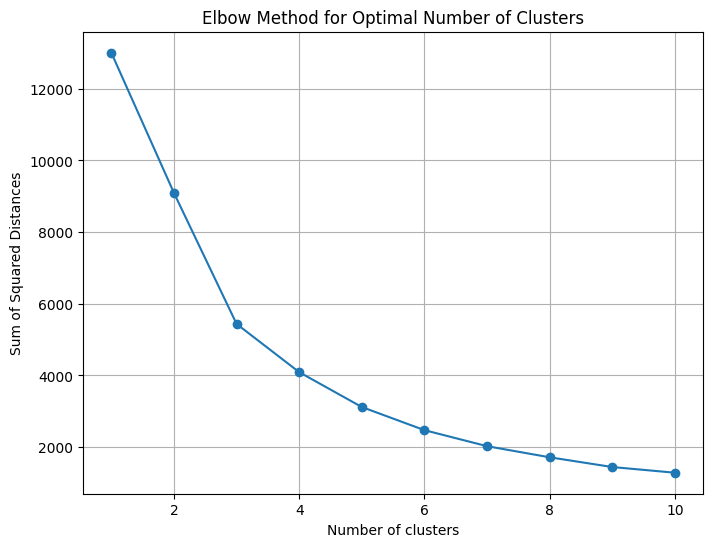

In [164]:


sum_squared_distances = []

# Loop over different values of k clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(features_scaled)
    
    sum_squared_distances.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sum_squared_distances, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()


In [165]:
# Since the elbow method shows that 5 or 6 is the optiman numberr of clusters, 
# I chose 5 becuase the difference between 6 and 5 is small

# Apply K-Means clustering

k = 5  
kmeans = KMeans(n_clusters=k, random_state=0)

# Fit the model and predict cluster labels
RFM_df_no_duplicates_outlier_removed['Cluster'] = kmeans.fit_predict(features_scaled)

# Display the DataFrame with cluster labels
print(RFM_df_no_duplicates_outlier_removed.head())

    CustomerID  Recency  Frequency  Monetary  Cluster
0        17850     5038         34   5391.21        4
9        13047     4698         10   3237.54        0
26       12583     4669         15   7281.38        4
46       13748     4762          5    948.25        0
65       15100     5000          3    876.00        2


c:\Users\45911\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\45911\AppData\Local\Temp\ipykernel_13512\1310180571.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM_df_no_duplicates_outlier_removed['Cluster'] = kmeans.fit_predict(features_scaled)


In [166]:
# Analyzing the characteristics of each cluster in the DataFrame without outliers
cluster_summary = RFM_df_no_duplicates_outlier_removed.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Number of Customers'})

print(cluster_summary)


             Recency   Frequency       Monetary  Number of Customers
Cluster                                                             
0        4710.451432    3.612117    1325.045477                 3037
1        4672.500000  120.500000   55312.686250                    8
2        4915.029245    1.550000     476.661841                 1060
3        4674.000000   42.833333  190863.461667                    6
4        4681.466667   20.853333   12400.283956                  225


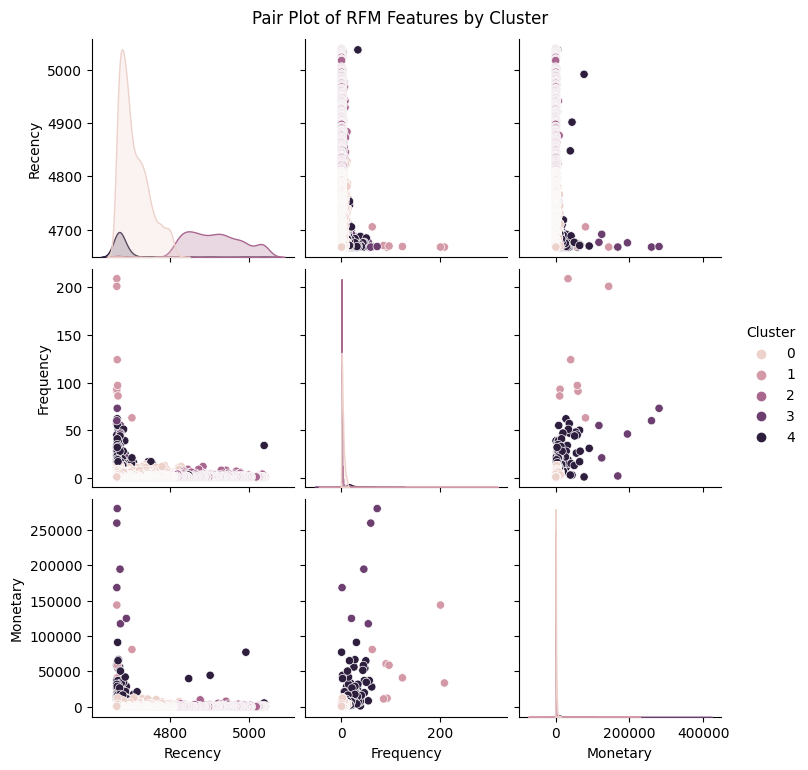

In [167]:
# Pair plot to visualize relationships between features, colored by cluster
sns.pairplot(RFM_df_no_duplicates_outlier_removed, hue='Cluster', vars=['Recency', 'Frequency', 'Monetary'])
plt.suptitle('Pair Plot of RFM Features by Cluster', y=1.02)
plt.show()


C:\Users\45911\AppData\Local\Temp\ipykernel_13512\1711140779.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM_df_no_duplicates_outlier_removed['TSNE1'] = features_tsne[:, 0]
C:\Users\45911\AppData\Local\Temp\ipykernel_13512\1711140779.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM_df_no_duplicates_outlier_removed['TSNE2'] = features_tsne[:, 1]


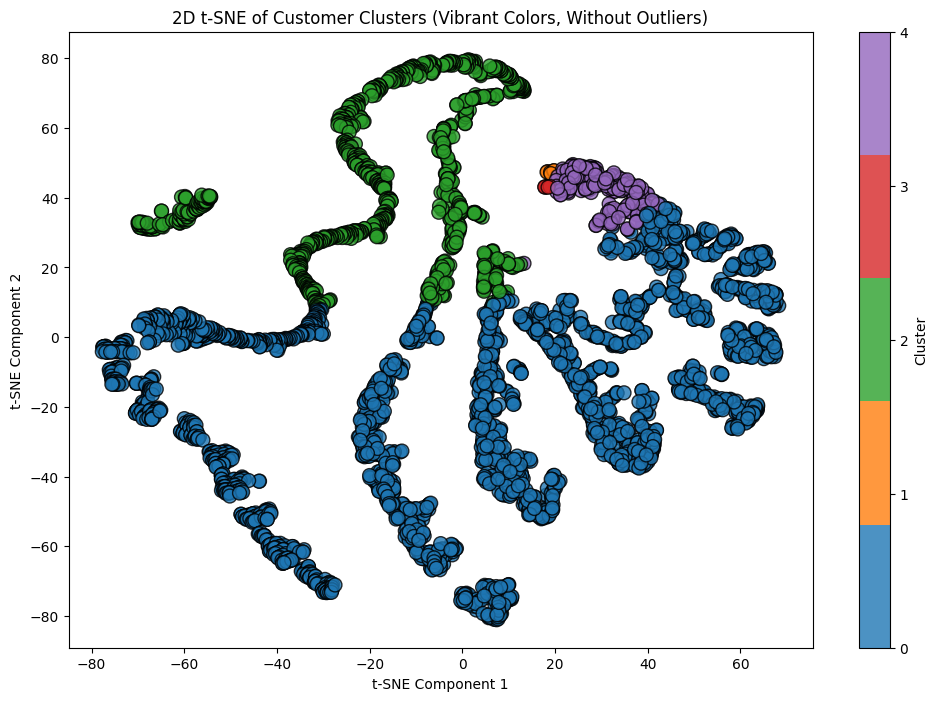

In [178]:

# Apply t-SNE to reduce features to 2D
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=0)
features_tsne = tsne.fit_transform(features_scaled)
RFM_df_no_duplicates_outlier_removed['TSNE1'] = features_tsne[:, 0]
RFM_df_no_duplicates_outlier_removed['TSNE2'] = features_tsne[:, 1]

vibrant_palette = ListedColormap(sns.color_palette("tab10", n_colors=5))  # tab10 provides vibrant colors

# Plot clusters in 2D 
plt.figure(figsize=(12, 8))
scatter = plt.scatter(RFM_df_no_duplicates_outlier_removed['TSNE1'], 
                      RFM_df_no_duplicates_outlier_removed['TSNE2'], 
                      c=RFM_df_no_duplicates_outlier_removed['Cluster'], 
                      cmap=vibrant_palette, alpha=0.8, edgecolor='k', s=100)

cbar = plt.colorbar(scatter, ticks=range(5))
cbar.set_label('Cluster')

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('2D t-SNE of Customer Clusters (Vibrant Colors, Without Outliers)')
plt.show()
